Analyzer

In [ ]:
# Import packages
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

root_path = '/content/drive/MyDrive/Codes/Riemannian-interior-point-trust-region-method'

Mounted at /content/drive


In [ ]:
# Set variables
problem_name = "NonnegPCA"

solver_name = ["RSQO_reghess_corr1e-02", "RSQO_reghess_corr1e-04", "RALM_SteepestDescent", "RIPM_RepMat_gamma0.9_beta0.0001_theta0.5", "RIPTRM_Exact_RepMat", "RIPTRM_tCG"]

# Paul Tol's color-blind-friendly palette
tol_colors = ["#4477AA", "#66CCEE", "#228833", "#CCBB44", "#EE6677", "#AA3377", "#BBBBBB"]

In [ ]:
# Preliminaries

def set_display_name(solver_name):
  if solver_name == "RIPTRM_tCG":
    return "RIPTRM (tCG)"
  elif solver_name == "RIPTRM_Exact_RepMat":
    return "RIPTRM (exact)"
  elif solver_name == "RALM_SteepestDescent":
    return "RALM"
  elif solver_name == "RSQO_reghess_corr1e-04":
    return "RSQO ($\\delta=10^{-4}$)"
  elif solver_name == "RSQO_reghess_corr1e-02":
    return "RSQO ($\\delta=10^{-2}$)"
  elif solver_name == "RIPM_RepMat_gamma0.9_beta0.0001_theta0.5":
    return "RIPM"

def set_xlabel(xaxis_col_name=None):
  if xaxis_col_name == None:
    return "Step"
  elif xaxis_col_name == "time":
    return "Time (sec)"

def set_ylabel(yaxis_col_name, is_y_logscale):
  ylabel = None
  if yaxis_col_name == "residual":
    ylabel = "KKT residual"
  elif yaxis_col_name == "second_order_residual":
    ylabel = r"$\text{Min. eigenvalue of } \text{Hess}_{x}\mathcal{L} \text{ over } C_{\text{w}}$"
  if is_y_logscale:
    ylabel = ylabel + " (log10 scale)"
  return ylabel

def set_color(solver_name):
  tol_colors = ["#4477AA", "#66CCEE", "#228833", "#CCBB44", "#EE6677", "#AA3377", "#BBBBBB"]
  if solver_name == "RIPTRM_tCG":
    return tol_colors[5]
  elif solver_name == "RIPTRM_Exact_RepMat":
    return tol_colors[4]
  elif solver_name == "RALM_SteepestDescent":
    return tol_colors[2]
  elif solver_name == "RSQO_reghess_corr1e-04":
    return tol_colors[1]
  elif solver_name == "RSQO_reghess_corr1e-02":
    return tol_colors[0]
  elif solver_name == "RIPM_RepMat" or solver_name == "RIPM_RepMat_gamma0.9_beta0.0001_theta0.5":
    return tol_colors[3]

         residual
0    4.986888e+00
1    1.559358e+00
2    1.014012e+00
3    6.049418e-02
4    4.868115e-04
..            ...
880  8.051244e-12
881  1.009901e-11
882  1.519337e-11
883  1.482634e-11
884  1.212252e-11

[885 rows x 1 columns]
         residual
0    4.986888e+00
1    1.559358e+00
2    1.022822e+00
3    6.129365e-02
4    5.062414e-04
..            ...
838  8.273461e-12
839  9.343845e-12
840  1.489377e-11
841  1.189420e-11
842  1.456462e-11

[843 rows x 1 columns]
       residual
0      4.986888
1      0.850131
2      0.701511
3      0.246005
4      0.017493
...         ...
9996   0.694494
9997   0.694494
9998   0.694494
9999   0.694494
10000  0.694494

[10001 rows x 1 columns]
         residual
0    4.986888e+00
1    1.915603e+00
2    1.486895e+00
3    7.502822e-01
4    4.099076e-01
..            ...
107  1.001464e-13
108  9.954076e-14
109  9.954076e-14
110  9.951390e-14
111  9.951390e-14

[112 rows x 1 columns]


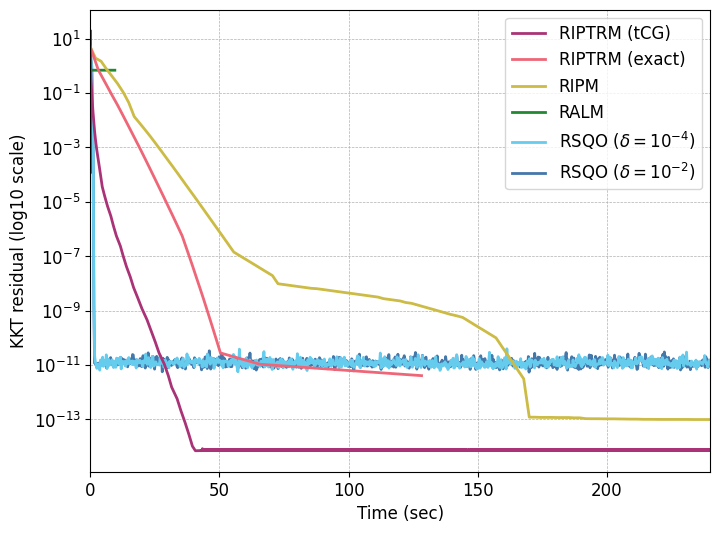

In [ ]:
# Graph plot

problem_instance = 1
problem_initialpoint = "a"
file_name = "log"

xaxis_col_name = "time"
yaxis_col_name = "residual"
is_y_logscale = True

# Initial setting
plt.figure(figsize=(8, 6))
plt.ylabel(f"{yaxis_col_name}")

# Collect information
load_path = f"{root_path}/intermediate/{problem_name}/{problem_instance}/{problem_initialpoint}"
for i, solver in enumerate(solver_name):
    # load the basic file
    log = pd.read_csv(f"{load_path}/{solver}_{file_name}.csv")

    # load the y-axis column
    if solver == "RIPTRM_tCG" or solver == "RIPTRM_Exact_RepMat":
      log = log[(log["inner_status"] == "converged") | (log["inner_status"].isna())]
      # log = log[(log["inner_status"] == "converged") | (log["inner_status"] == "successful") | (log["inner_status"].isna())]
      yloaded = log.loc[:,yaxis_col_name]
      yloaded = yloaded.to_frame()
      yloaded.columns = [solver]
    else:
      yloaded = log.loc[:,yaxis_col_name]
      yloaded = yloaded.to_frame()
      print(yloaded)
      yloaded.columns = [solver]
    if xaxis_col_name == None:
      color = set_color(solver)
      display_name = set_display_name(solver)
      plt.plot(yloaded, label=display_name, color=color, linestyle="-", linewidth=2)
    else:
      xloaded = log.loc[:,xaxis_col_name]
      xloaded = xloaded.to_frame()
      xloaded.columns = [solver]
      color = set_color(solver)
      display_name = set_display_name(solver)
      plt.plot(xloaded, yloaded, label=display_name, color=color, linestyle="-", linewidth=2)


# # set x, y, display names
xlabel = set_xlabel(xaxis_col_name)
ylabel = set_ylabel(yaxis_col_name, is_y_logscale)
plt.xlabel(xlabel, fontsize="large")
plt.ylabel(ylabel, fontsize="large")

plt.tick_params(axis="x", labelsize="large")
plt.tick_params(axis="y", labelsize="large")

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc="upper right", title_fontsize="large", fontsize="large")

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
if is_y_logscale:
    plt.yscale("log")

plt.gca().set_xlim(left=0, right=240)

# Save the plot
output_folder = f'{root_path}/result/{problem_name}/{problem_instance}/{problem_initialpoint}'
os.makedirs(f"{root_path}/result/{problem_name}", exist_ok=True)
os.makedirs(f"{root_path}/result/{problem_name}/{problem_instance}", exist_ok=True)
os.makedirs(output_folder, exist_ok=True)  # create {problem_name} folder under 'result' folder
# plt.savefig(f"{output_folder}/{xaxis_col_name}_{yaxis_col_name}_inner.pdf", bbox_inches="tight")
plt.savefig(f"{output_folder}/{xaxis_col_name}_{yaxis_col_name}_outer.pdf", bbox_inches="tight")

         residual
0    4.986888e+00
1    1.559358e+00
2    1.014012e+00
3    6.049418e-02
4    4.868115e-04
..            ...
880  8.051244e-12
881  1.009901e-11
882  1.519337e-11
883  1.482634e-11
884  1.212252e-11

[885 rows x 1 columns]
         residual
0    4.986888e+00
1    1.559358e+00
2    1.022822e+00
3    6.129365e-02
4    5.062414e-04
..            ...
838  8.273461e-12
839  9.343845e-12
840  1.489377e-11
841  1.189420e-11
842  1.456462e-11

[843 rows x 1 columns]
       residual
0      4.986888
1      0.850131
2      0.701511
3      0.246005
4      0.017493
...         ...
9996   0.694494
9997   0.694494
9998   0.694494
9999   0.694494
10000  0.694494

[10001 rows x 1 columns]
         residual
0    4.986888e+00
1    1.915603e+00
2    1.486895e+00
3    7.502822e-01
4    4.099076e-01
..            ...
107  1.001464e-13
108  9.954076e-14
109  9.954076e-14
110  9.951390e-14
111  9.951390e-14

[112 rows x 1 columns]


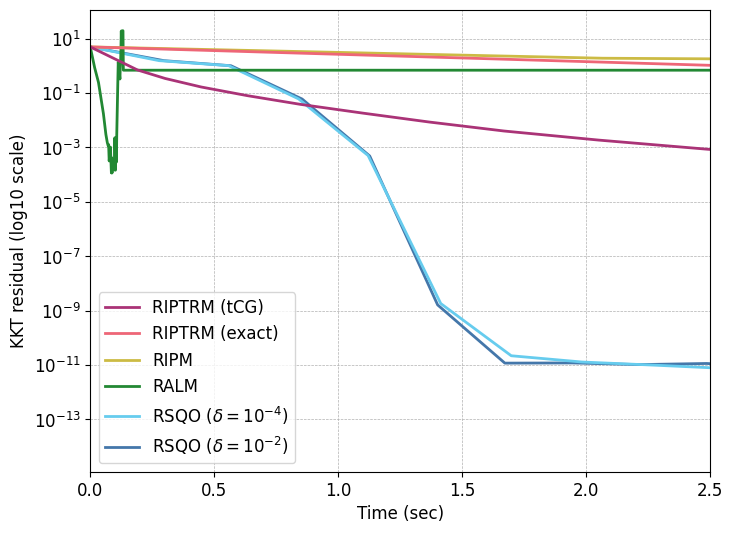

In [ ]:
# Graph plot

problem_instance = 1
problem_initialpoint = "a"
file_name = "log"

xaxis_col_name = "time" # None
yaxis_col_name = "residual"
is_y_logscale = True

# Initial setting
plt.figure(figsize=(8, 6))
plt.ylabel(f"{yaxis_col_name}")

# Collect information
load_path = f"{root_path}/intermediate/{problem_name}/{problem_instance}/{problem_initialpoint}"
for i, solver in enumerate(solver_name):
    # load the basic file
    log = pd.read_csv(f"{load_path}/{solver}_{file_name}.csv")

    # load the y-axis column
    if solver == "RIPTRM_tCG" or solver == "RIPTRM_Exact_RepMat":
      log = log[(log["inner_status"] == "converged") | (log["inner_status"].isna())]
      # log = log[(log["inner_status"] == "converged") | (log["inner_status"] == "successful") | (log["inner_status"].isna())]
      yloaded = log.loc[:,yaxis_col_name]
      yloaded = yloaded.to_frame()
      yloaded.columns = [solver]
    else:
      yloaded = log.loc[:,yaxis_col_name]
      yloaded = yloaded.to_frame()
      print(yloaded)
      yloaded.columns = [solver]
    if xaxis_col_name == None:
      color = set_color(solver)
      display_name = set_display_name(solver)
      plt.plot(yloaded, label=display_name, color=color, linestyle="-", linewidth=2)
    else:
      xloaded = log.loc[:,xaxis_col_name]
      xloaded = xloaded.to_frame()
      xloaded.columns = [solver]
      color = set_color(solver)
      display_name = set_display_name(solver)
      plt.plot(xloaded, yloaded, label=display_name, color=color, linestyle="-", linewidth=2)


# # set x, y, display names
xlabel = set_xlabel(xaxis_col_name)
ylabel = set_ylabel(yaxis_col_name, is_y_logscale)
plt.xlabel(xlabel, fontsize="large")
plt.ylabel(ylabel, fontsize="large")

plt.tick_params(axis="x", labelsize="large")
plt.tick_params(axis="y", labelsize="large")

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc="lower left", title_fontsize="large", fontsize="large")

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
if is_y_logscale:
    plt.yscale("log")

plt.gca().set_xlim(left=0, right=2.5)

# Save the plot
output_folder = f'{root_path}/result/{problem_name}/{problem_instance}/{problem_initialpoint}'
os.makedirs(f"{root_path}/result/{problem_name}", exist_ok=True)
os.makedirs(f"{root_path}/result/{problem_name}/{problem_instance}", exist_ok=True)
os.makedirs(output_folder, exist_ok=True)  # create {problem_name} folder under 'result' folder
# plt.savefig(f"{output_folder}/{xaxis_col_name}_{yaxis_col_name}_inner.pdf", bbox_inches="tight")
plt.savefig(f"{output_folder}/{xaxis_col_name}_{yaxis_col_name}_outer_first.pdf", bbox_inches="tight")